<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/Copy_of_Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit3NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [1]:

!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


**PROJECT & CONTEXT**

For my project, I wanted analyze historical data for U.S Soybean futures. Futures are contracts where buyers promise to purchase an asset at a future date/price. Futures require the buyer to buy an asset at a set price when the contract expires, regardless of its' market price at that time. A Futures contract is a type of derivative, meaning its' value comes from the change in the asset's price.

As a result, futures are highly speculative, and even more so in agricultural crops. The soybean sector is especially important in the U.S economy averaged a total economic impact of 124 Billion USD from crop years 2019/20 and 2021/22, and along with corn accounted for more than half the U.S Crop cash reciepts in 2023.

In this project, I'll be determining the true average of U.S Soybean futures, which are especially speculative as a result of various factors such as supply, weather conditions, and geopolitical events. By looking at historical data, I' trying to develop an model that accurately estimates the true average price of soybean futures over time. Finding the true average will get rid of some of the noise and unpredictability in my data, showing us a more reliable estimate of where things are at, which will help speculate future prices based off everything that we know.

In [13]:
url_soybeans = 'https://raw.githubusercontent.com/AdityaGhatty/Datascience/main/US%20Soybeans%20Futures%20Historical%20Data%20(1).csv'
data_soybeans = pd.read_csv(url_soybeans)
price = data_soybeans['Price'].values #making a list[] of all prices
price = pd.Series(price)  # Convert to a Pandas Series for easy handling
price = pd.to_numeric(price, errors='coerce')  # Convert values to numeric, setting non-numeric to NaN
price = price[price > 0]

data_soybeans.dropna(inplace=True) #Removes non-number values
data_soybeans ###print csv



,Date,Price,Open,High,Low,Vol.,Change %
1,10/07/2024,"1,034.00","1,033.50","1,039.00","1,026.50",147.00K,-0.36%
2,10/04/2024,"1,037.75","1,045.00","1,055.25","1,036.25",136.66K,-0.79%
3,10/03/2024,"1,046.00","1,053.75","1,056.25","1,041.75",126.13K,-0.95%
4,10/02/2024,"1,056.00","1,055.00","1,063.75","1,042.50",158.80K,-0.12%
5,10/01/2024,"1,057.25","1,055.75","1,065.50","1,045.00",165.02K,0.02%
...,...,...,...,...,...,...,...
248,10/13/2023,"1,280.25","1,286.75","1,298.50","1,273.50",139.75K,-0.76%
249,10/12/2023,"1,290.00","1,252.50","1,299.75","1,250.50",235.47K,2.99%
250,10/11/2023,"1,252.50","1,271.50","1,274.25","1,251.00",185.25K,-1.49%
251,10/10/2023,"1,271.50","1,263.00","1,273.25","1,254.25",161.65K,0.57%


**PRIORS**

For my prior, I estimate that Soybeans futures averaged near 1,100 USD between October 9th 2023 and 2024. I came to this conclusion by just looking at the data from my CSV and guessing based on the highest (slightly under USD 1300) and lowest (Over USD 900) daily prices.

I expect the price to cluster around this value at both sides, more or less equally, so I'm using a normal distribution for my prior, with mean 1100 and a Std Deviation of 66.7 (200/3), because of the empirical rule, stating that almost all data should be within 3 Sigmas from the Mew.

<Axes: >

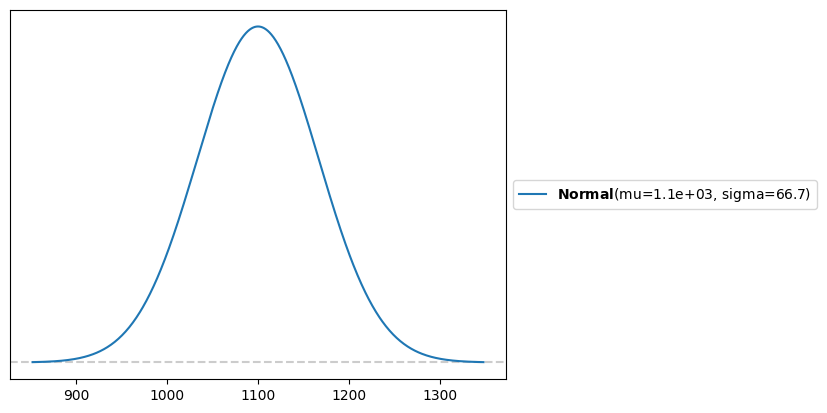

In [3]:
#Using a normal distribution for the Prior, STDEV at 66.7, Mean at 1100


prior = pz.Normal(mu=1100,sigma=66.7)
prior.plot_pdf() #doing the same thing just so I can see it

I'm including another prior for variance to check how much the data fluctuates. Variance is the average squared deviations from the mean, and is used to express uncertainity aroud how much the data will fluctuate from my mean. My next prior will be an inverse-gamma distribution. I chose this because it is has all positive values and can be adjusted by parameters, allowing for a flexible shape.



<Axes: >

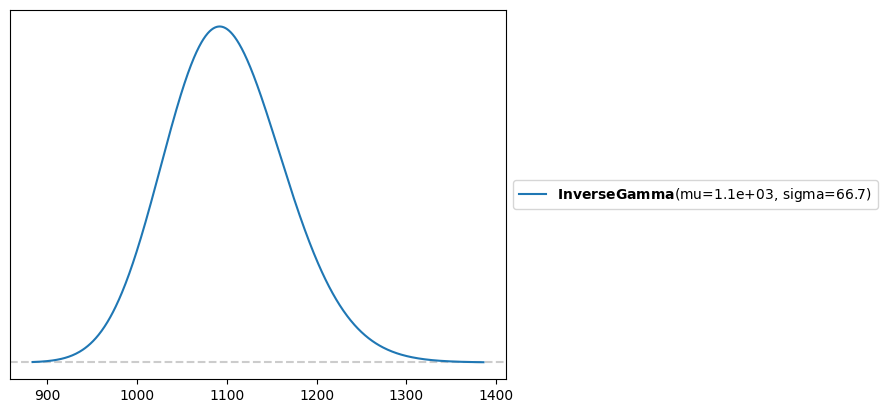

In [4]:
pz.InverseGamma(mu = 1100, sigma = 66.7).plot_pdf()

Not really what I expected. The other variables that this takes are Alpha and Beta, so I'll use those instead when I figure out what they.... *MEAN!*

Inv Gamma parameters:

alpha - 3

-accounts for shape, 3 is a moderate value and will not include too many extremes but isn't too flat either.

Beta - 200

half of range (~400)

<Axes: >

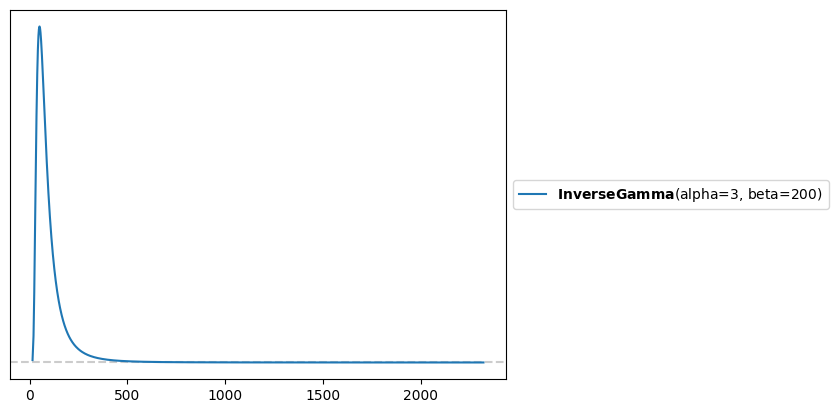

In [ ]:
variance_prior1=pz.InverseGamma(alpha = 3, beta = 200)
variance_prior1.plot_pdf()

Looks better now, variance peaking in the lower area to show a decent variability, not too big. I can always adjust the shape later.

**LIKELIHOOD**

For my likelihood, I want to use the same normal distribution because of my assumption that the data is on both sides of the mean in a fairly normal way, like what I saw going through my data. However, I will use pm.math.sqrt of my prior variance as my sigma, instead of typing it as it is, so I can combine my variance prior into this.


In [14]:
#with pm.Model() as model:

  #μ = pm.Normal('μ', mu=1100,sigma=66.7) #Mu for the likelihood, prior #1
  #σ = pm.InverseGamma('σ', alpha = 3, beta = 200) #Sigma for the likelihood, prior #2
  #Y = pm.Normal('Y', mu = μ, sigma = σ, observed=price)
  #trace_soybeans = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

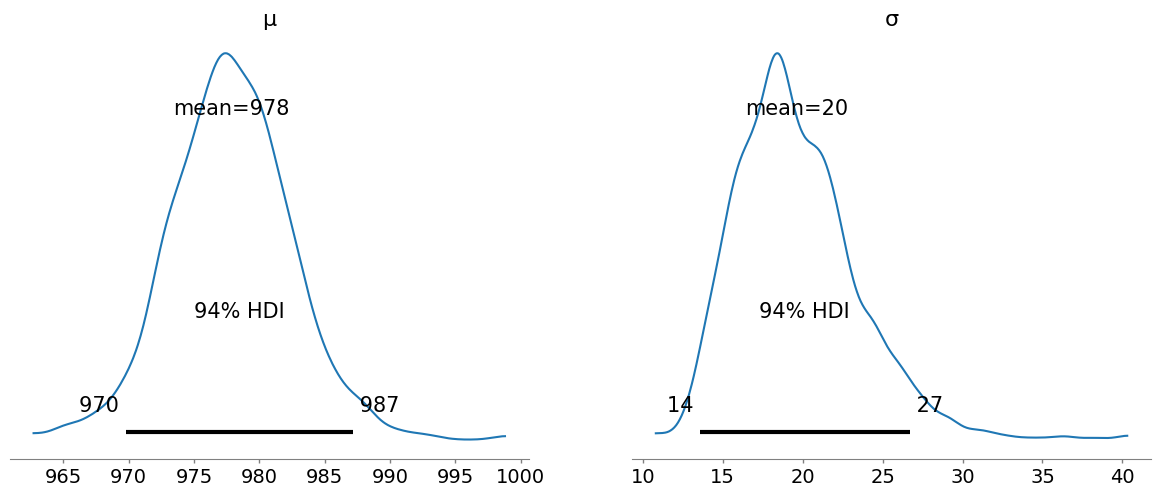

In [15]:
#az.plot_posterior(trace_soybeans)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

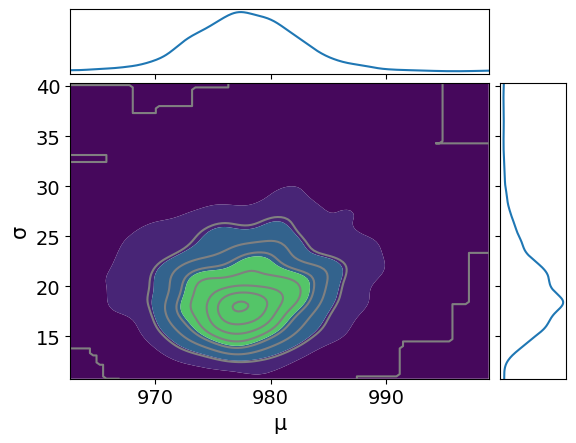

In [16]:
#az.plot_pair(trace_soybeans, kind='kde', marginals=True)

This is an interesting Mu value that it returns, at around 980. From looking at my data (after removing NaN values) I still see most values much higher than this, so I'm assuming something is wrong. I'll now try and calculate the average instead of eyeballing it.

In [22]:
average_price = price.mean()
print(average_price)

977.1388888888889


Now that I know its around 977, I'll update the info for prior 1 now. I'm not sure why it's that low, but I doubt the observed mean less now.

<Axes: >

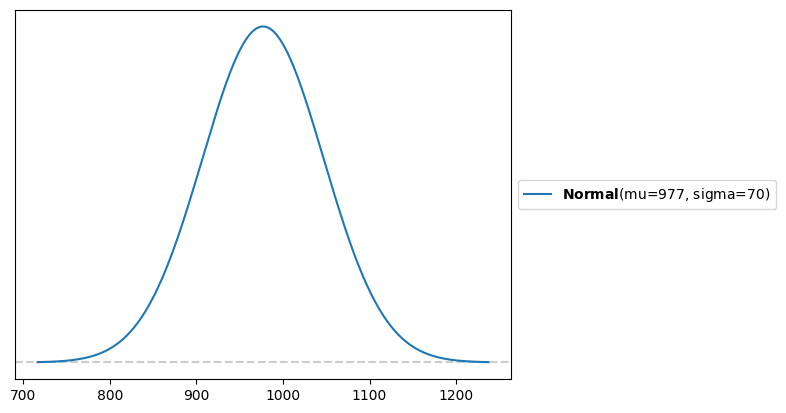

In [29]:
pz.Normal(mu = 977, sigma = 70).plot_pdf()

Output()

Output()

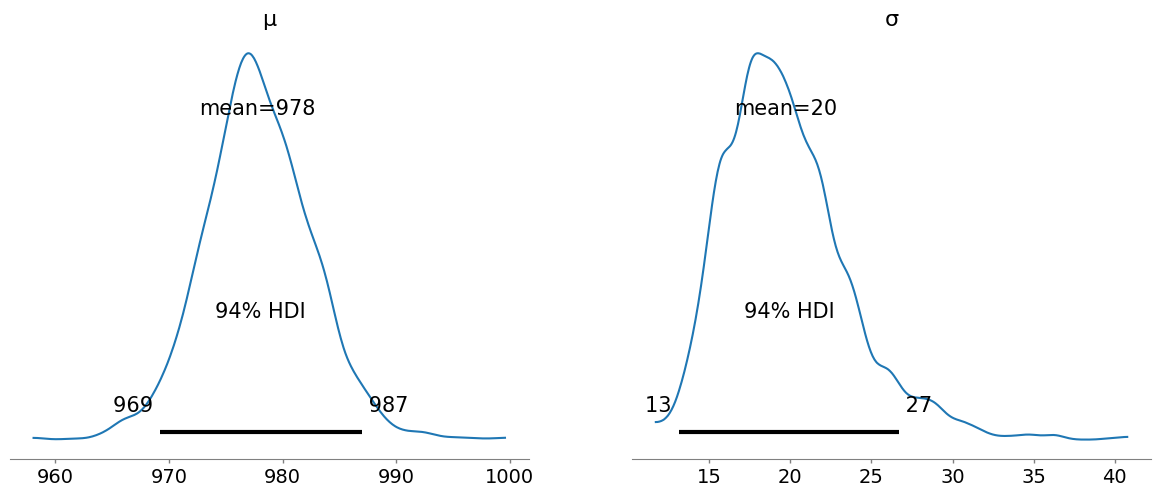

In [30]:
with pm.Model() as model:

  μ = pm.Normal('μ', mu=1100,sigma=66.7) #Mu for the likelihood, prior #1
  σ = pm.InverseGamma('σ', alpha = 3, beta = 200) #Sigma for the likelihood, prior #2
  Y = pm.Normal('Y', mu = μ, sigma = σ, observed=price)
  trace_soybeans = pm.sample()
  az.plot_posterior(trace_soybeans)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

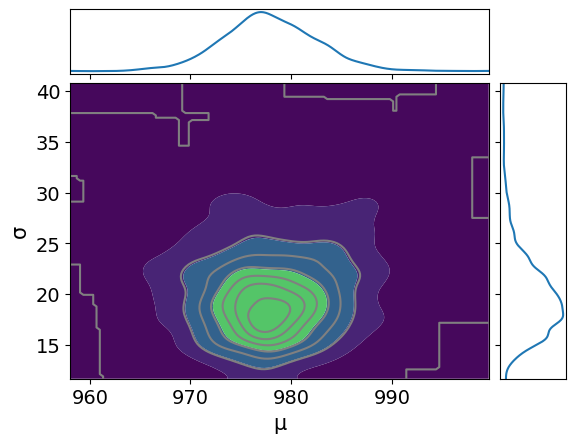

In [31]:
az.plot_pair(trace_soybeans, kind='kde', marginals=True)

In [32]:
pm.sample_posterior_predictive(trace_soybeans, model=model, extend_inferencedata=True)


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

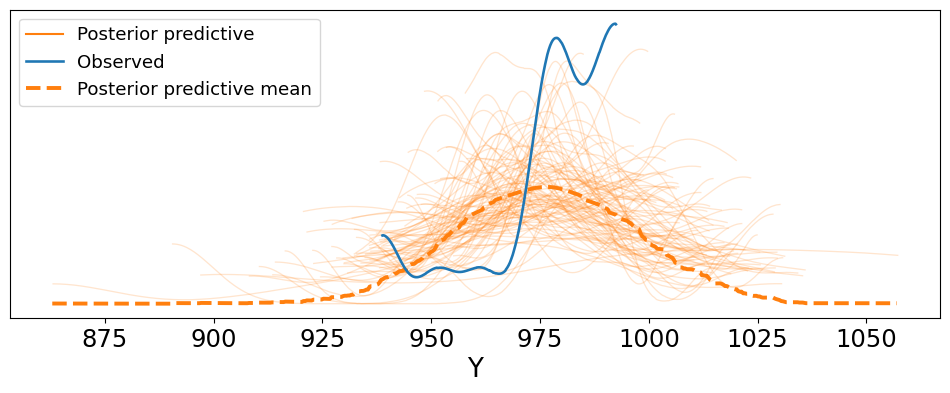

In [33]:
az.plot_ppc(trace_soybeans, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


Huge problem here, where it looks like the density of my posterior predictive is lower at lower mean values, rises much less dramatically as it does in my observed, and goes back down when it should be peaking at higher values.

After some research, I found that the studentT distribution is heavier tailed and may help with peaks/outliers.

Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

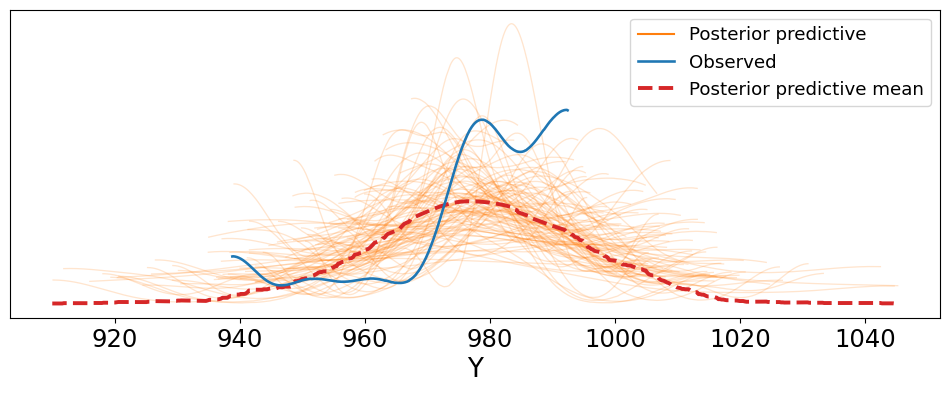

In [47]:
with pm.Model() as SoyModel:
  Mew = pm.Normal('Mew', mu=977, sigma=200)
  me = pm.InverseGamma('me', alpha=10, beta=200)
  ν = pm.Exponential('ν', 1/100) # Degrees of freedom parameter, higher this is the more the distribution will look normal (bad)
  Y = pm.StudentT('Y', mu=Mew, sigma=me, nu=ν, observed=price)
  trace_soybeans = pm.sample()
  pm.sample_posterior_predictive(trace_soybeans, model=SoyModel, extend_inferencedata=True)
  az.plot_ppc(trace_soybeans, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C3"])

After some more research and trial/error, I found the logistic distribution as what I imagine would be a better fit as it has much heavier tails.

Output()

Output()

Output()

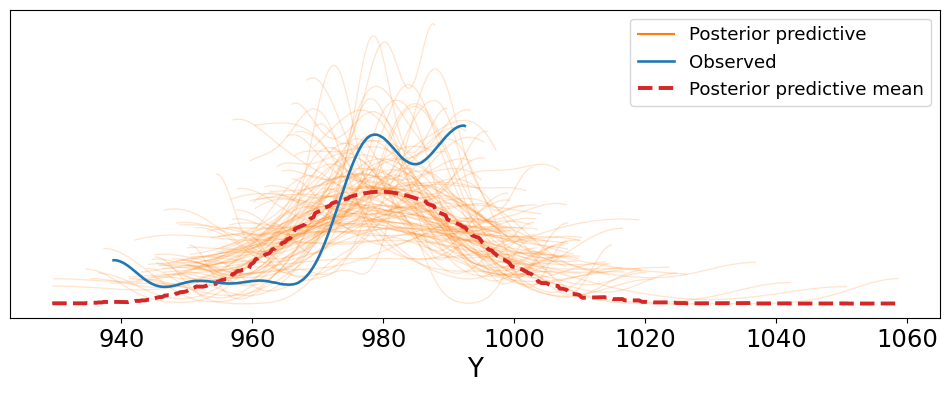

In [48]:
with pm.Model() as SoyModel:
    # Logistic distribution parameters
    loc = pm.Normal('loc', mu=1100, sigma=100)  # Mean
    scale = pm.HalfNormal('scale', sigma=50)     # Scale for spread?

    # Logistic likelihood
    Y = pm.Logistic('Y', mu=loc, s=scale, observed=price)

    # Sampling
    trace_soybeans = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace_soybeans, model=SoyModel, extend_inferencedata=True)

    # Plot posterior predictive checks
    az.plot_ppc(posterior_predictive, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C3"])

Output()

Output()

Output()

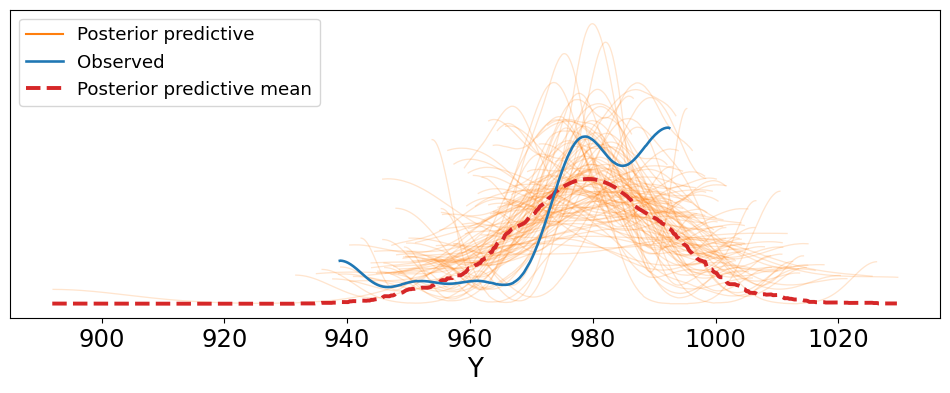

In [52]:
with pm.Model() as model_soybeans:
    loc = pm.Normal('loc', mu=977, sigma=20)
    scale = pm.HalfNormal('scale', sigma=5)
    Y = pm.Logistic('Y', mu=loc, s=scale, observed=price)
    trace_soybeans = pm.sample()
    pm.sample_posterior_predictive(trace_soybeans, model=model_soybeans, extend_inferencedata=True)
    az.plot_ppc(trace_soybeans, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C3"])

Overpredicts from ~960 to 970, and underpredicts after that. I'm seeing an accurate mean, but I think there should be a change in steepness. After playing around with each variable, I found that decreasing the sigma of the scale value does this.

Output()

Output()

Output()

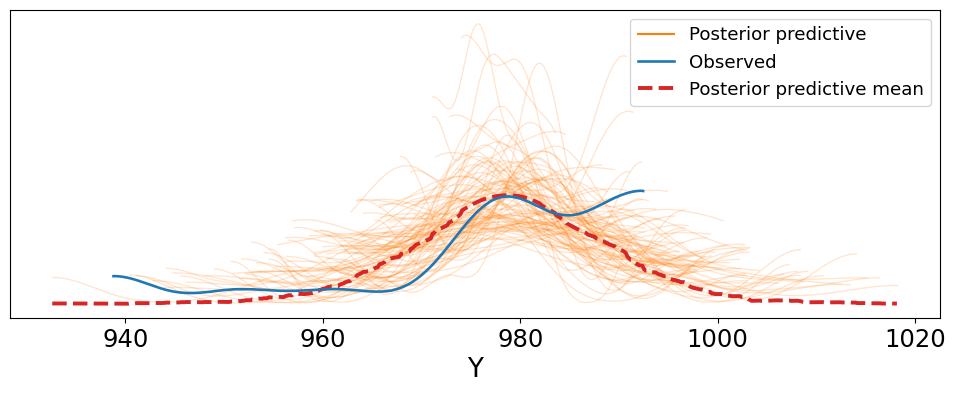

In [53]:
with pm.Model() as model_soybeans:
    loc = pm.Normal('loc', mu=977, sigma=20)
    scale = pm.HalfNormal('scale', sigma=2)
    Y = pm.Logistic('Y', mu=loc, s=scale, observed=price)
    trace_soybeans = pm.sample()
    pm.sample_posterior_predictive(trace_soybeans, model=model_soybeans, extend_inferencedata=True)
    az.plot_ppc(trace_soybeans, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C3"])

This is by far the most accurate I've been able to get it, after a lot of different models and distributions tested.